In [31]:
import pickle
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

In [32]:
data = pd.read_csv('cleaneddata.csv')
data['underweight'] = [1 if x < 17.85 else 0 for x in data['bmi']]
data['normal']= [1 if x >= 17.85 and x<=30.5 else 0 for x in data['bmi']]
data['overweight'] = [1 if x > 30.5 and x <= 37.5 else 0 for x in data['bmi']]
data['severlyoverweight'] = [1 if x > 37.5 and x <= 45.5 else 0 for x in data['bmi']]
data['ogre'] = [1 if x > 45.5 else 0 for x in data['bmi']]
data['nokid'] = [1 if x ==0 else 0 for x in data['children']]
data['onekid'] = [1 if x ==1 else 0 for x in data['children']]
data['twokid'] = [1 if x ==2 else 0 for x in data['children']]
data['threekid'] = [1 if x ==3 else 0 for x in data['children']]
data['fourkid'] = [1 if x ==4 else 0 for x in data['children']]
data['fivekid'] = [1 if x ==5 else 0 for x in data['children']]
data['elderfemale'] = [1 if x > 60.75 and x else 0 for x in data['age']]
data['middleagefemale'] = [1 if x <= 60.75 and x>47.5 else 0 for x in data['age']]
data['youngerfemale'] = [1 if x <= 46.5 and x>42.5 else 0 for x in data['age']]
data['youngfemale'] = [1 if x <= 38 and x>31 else 0 for x in data['age']]
data['teens']= [1 if x <=21.5 else 0 for x in data['age']]
data['test'] = [1 if x <= 31 and x>21.5 else 0 for x in data['age']]

In [33]:
X = data[['smoker','normal', 'is_east','is_north','underweight', 'overweight','severlyoverweight','ogre','nokid', 'onekid', 'twokid','fourkid', 'fivekid','test','elderfemale','middleagefemale', 'youngerfemale', 'youngfemale', 'teens', 'sex']]
y = data['charges']

In [34]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

regression = linear_model.Lasso(alpha=13.25, tol=0.08)

model = regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("root mean squared error: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

root mean squared error: 3086.159
Coefficient of determination: 0.9343


Text(0.5, 1.0, 'y_pred vs y_test')

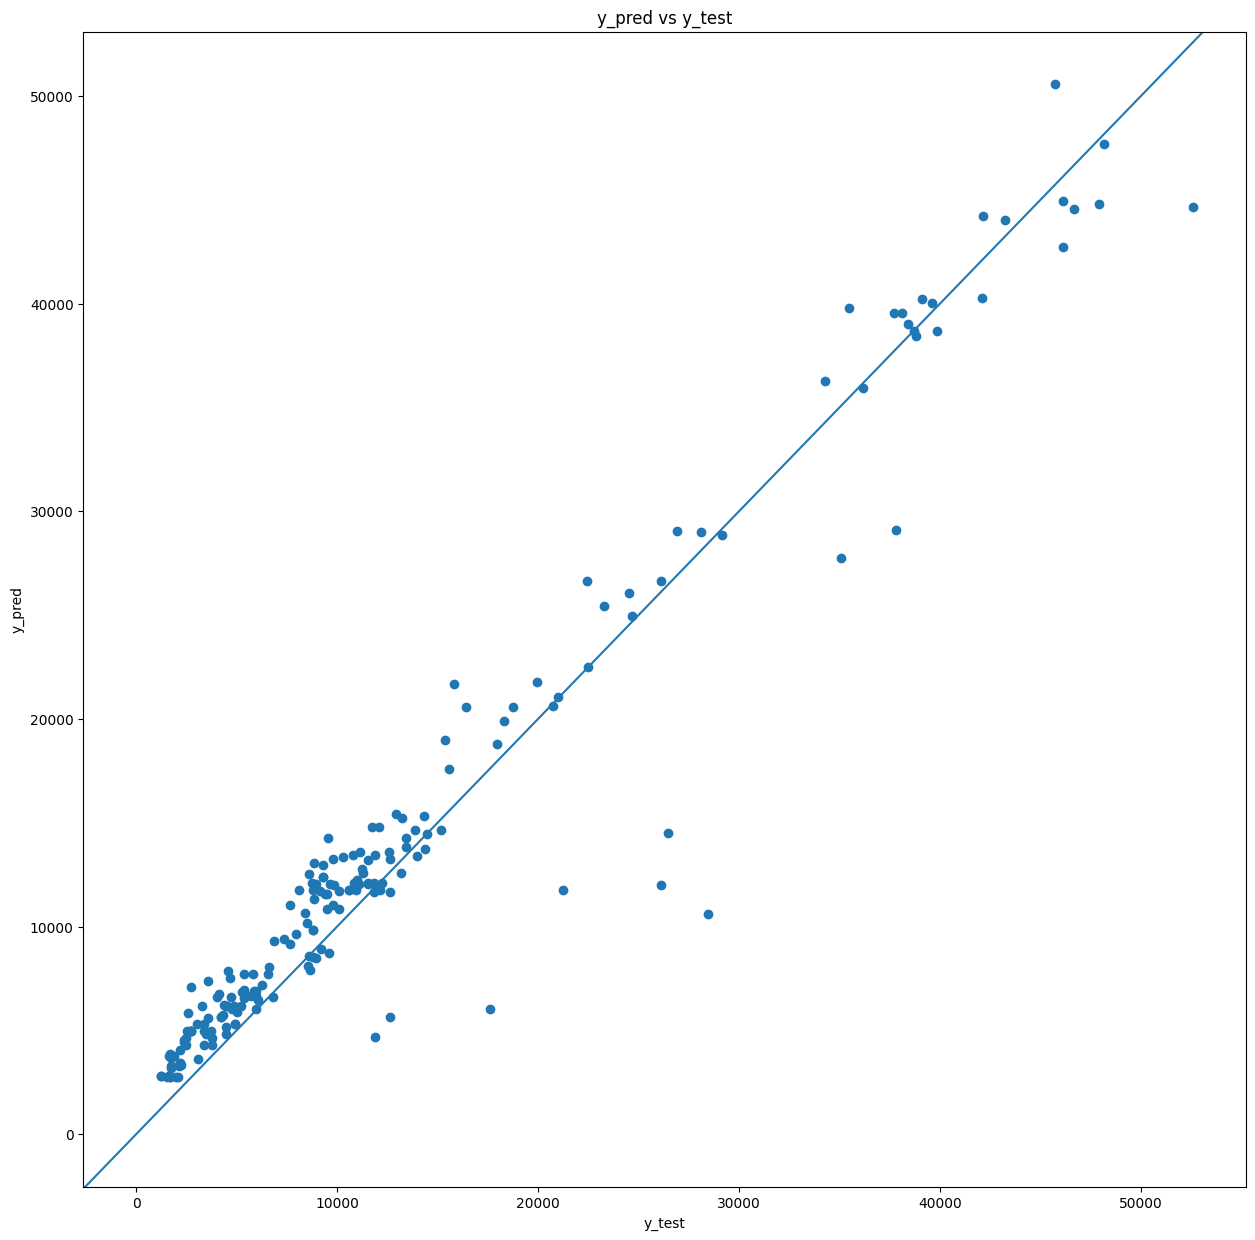

In [35]:
plt.pyplot.figure(figsize=(15,15))
plt.pyplot.scatter(y_test,y_pred)

plt.pyplot.axline((0,0),slope=1)
plt.pyplot.xlabel('y_test')
plt.pyplot.ylabel('y_pred')
plt.pyplot.title('y_pred vs y_test')

In [36]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)